# 線形回帰の解釈

## t検定

線形回帰の係数比較
- statsmodels.api.OLS (Ordinary Least Square)
    1. OLS(y, X)でインスタンスの生成　 
        - 注意：（y, X）の順番であることに注意！
        - また、OLSに入れるXは必ずバイアス項（定数項）θ0の入れなければいけない（そのために、.add_constant(X)を使う）
    2. .fit()
    3. .summary()でレポート出力
- statsmodels.api.add_constant(X)
    - バイアス項用の列を追加

In [4]:
import pandas as pd
df = pd.read_csv('sample_data2.csv')
y_col = 'rent'
X = df.drop(columns=[y_col])
y = df[y_col]

In [5]:
df

,space,rent,age
0,20,13.958824,3
1,25,11.533805,13
2,28,14.269547,18
3,30,18.722680,10
4,36,19.602674,6
5,51,16.068166,1
6,55,23.183599,5
7,62,22.212595,2
8,83,29.357010,5
9,103,37.565129,23


In [12]:
# 線形回帰
import statsmodels.api as sma
# バイアス項（定数項）追加
X = sma.add_constant(X)
est = sma.OLS(y, X)
est_trained = est.fit()
# レポート出力（標準化前）
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           0.000282
Time:                        00:51:26   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4150      2.043      3.140      0.0

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


coef:　線形回帰の傾き\
t: 検定統計量\
P>t: P値　\
    0.05より小さいと帰無仮説：この線形回帰の係数は0ではない　を採択（相関性が強いと判断） \
    0.05より大きいと帰無仮説：この線形回帰の係数は0ではない　を棄却（相関性がないと判断） \
                  
ここでは、spaceはｐ値0.000なので、相関性が強い。一方で、ageは0.386で0.005より大きいで相関性がない。\
sns.pariplot(X)を使って全体の相関を見るのが便利

F検定の際は、F-statisticとProb (F-statistic)を確認すれば良い \
Prob (F-statistic)が0.000282で0.005より小さいため帰無仮説を棄却 -> 少なくともどれかの係数は0ではない（少なくともどれかの特徴量は相関がある）という意味

In [7]:
X

,const,space,age
0,1.0,20,3
1,1.0,25,13
2,1.0,28,18
3,1.0,30,10
4,1.0,36,6
5,1.0,51,1
6,1.0,55,5
7,1.0,62,2
8,1.0,83,5
9,1.0,103,23


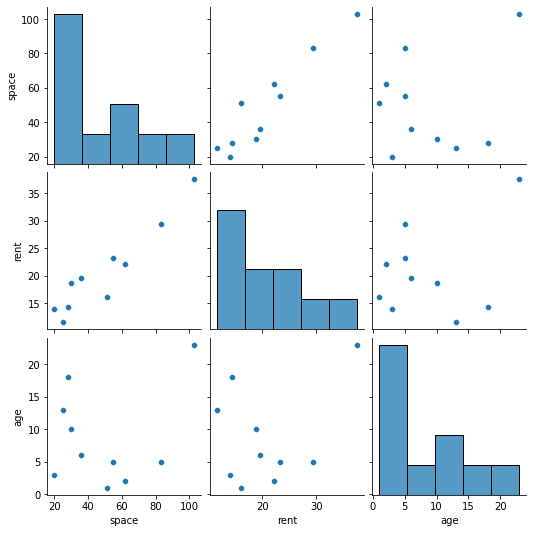

In [11]:
import seaborn as sns 
sns.pairplot(df)

In [14]:
# 標準化
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=[y_col])
y = df[y_col]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sma.add_constant(X_scaled)

In [15]:
X_scaled

array([[ 1.        , -1.13466215, -0.8062772 ],
       [ 1.        , -0.9410338 ,  0.63350351],
       [ 1.        , -0.82485679,  1.35339387],
       [ 1.        , -0.74740544,  0.2015693 ],
       [ 1.        , -0.51505142, -0.37434298],
       [ 1.        ,  0.06583364, -1.09423334],
       [ 1.        ,  0.22073632, -0.51832106],
       [ 1.        ,  0.49181602, -0.95025527],
       [ 1.        ,  1.3050551 , -0.51832106],
       [ 1.        ,  2.07956852,  2.07328422]])

In [18]:
# 標準化後のレポート
est = sma.OLS(y, X_scaled)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           0.000282
Time:                        01:07:51   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6474      0.884     23.355      0.0

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
